In [1]:
import scqubits as scq
import numpy as np
import qutip as qt

In [2]:
Ec = 0.2
EL = 5  # Example value for EL
EJ = 3  # Example value for EJ
phi_ex = 0.25  # Example value for phi_ex
# Set the base flux
fluxonium1 = scq.Fluxonium(
    EJ=EJ,
    EC=Ec,
    EL=EL,
    cutoff = 150,
    flux = phi_ex,
    truncated_dim=5
)

In [3]:
e = fluxonium1.eigenvals()
e-= e[0]

In [4]:
e

array([ 0.        ,  3.1284451 ,  6.16925597,  9.13430683, 12.03820082,
       14.89661597])

In [5]:
import scqubits as scq
import numpy as np
from scipy.special import factorial
# import autograd.numpy as np
import matplotlib.pyplot as plt
import scipy as sci
from functions import *
def fluxonium_paras(Ec, EL, EJ, phi_ex):
    # Define the potential function
    def potential(phi, EL, EJ, phi_ex):
        return 0.5 * EL * phi**2 - EJ * np.cos(phi + phi_ex)

    # Function to find the minimum
    def find_minimum(EL, EJ, phi_ex, initial_guess=0):
        phi_ex = phi_ex*2*np.pi
        result = sci.optimize.minimize(potential, x0=initial_guess, args=(EL, EJ, phi_ex))
        return result.x  # The value of phi at the minimum

    # Example usage

    phi_min = find_minimum(EL, EJ, phi_ex)
    phi_ex = phi_ex*2*np.pi

    beta = EJ/EL
    sdim = 20
    phi_min = find_minimum(EL,EJ,phi_ex)
    # potential expansion around minimum
    c2 = beta*np.cos(phi_min + phi_ex) + 1
    c3 = -beta*np.sin(phi_min + phi_ex)
    c4 = -beta*np.cos(phi_min + phi_ex)
    c5 = beta*np.sin(phi_min + phi_ex)
    c6 = beta*np.cos(phi_min + phi_ex)
    omega_s = np.sqrt(8*c2*EL*Ec)
    phi_zpf = np.power(2*Ec/(EL*c2),1/4)
    g2 = EL * phi_zpf**2*c2/2
    g3 = EL * phi_zpf ** 3 * c3 / 3 / 2
    g4 = EL * phi_zpf ** 4 * c4 / 4 / 3 /2
    g5 = EL * phi_zpf ** 5 * c5 / 5 / 4 / 3 / 2
    g6 = EL * phi_zpf ** 6 * c6 / 6 / 5 / 4 / 3 / 2
    s = annihilation(sdim)
    sd = creation(sdim)
    x2 = np.matmul(s+sd,s+sd)
    x3 = np.matmul(x2,s+sd)
    x4 = np.matmul(x3,s+sd)
    x5 = np.matmul(x4,s+sd)
    x6 = np.matmul(x5,s+sd)
    phi_op = phi_zpf*(s+sd)+(phi_min)*np.identity(sdim)
    Hs =omega_s * np.matmul(sd,s)- EL*(beta*sci.linalg.cosm(phi_op-(phi_ex)*np.identity(sdim))- 1/2*phi_op@phi_op)- g2*x2

    # print(g3*x3 + g4*x4 )
    Hs =omega_s * np.matmul(sd,s) + g3*x3 + g4*x4 
    charge_op = -1j*(s-sd)/(2*phi_zpf)
    energy0,U = np.linalg.eigh(Hs)
    energy0 = energy0 - energy0[0]
    Ud = U.transpose().conjugate()
    Hs = Ud@Hs@U
    Hs = Hs - Hs[0,0]*np.identity(sdim)
    phase_op, charge_op = Ud@phi_op@U,Ud@charge_op@U
    return Hs,phase_op, omega_s, phi_zpf, g3, g4, g5, g6


In [42]:
def potential(phi, EL, EJ, phi_ex):
    return 0.5 * EL * phi**2 - EJ * np.cos(phi + phi_ex)
def potential1(phi, EL, EJ, phi_ex):
    return 0.5 * EL * phi**2 
def potential2(phi, EL, EJ, phi_ex):
    return - EJ * np.cos(phi + phi_ex)

# Function to find the minimum
def find_minimum(EL, EJ, phi_ex, initial_guess=-1):
    phi_ex = phi_ex*2*np.pi
    result = sci.optimize.minimize(potential, x0=initial_guess, args=(EL, EJ, phi_ex))
    return result.x  # The value of phi at the minimum


# Example usage
Ec = 0.2
EL = 5  # Example value for EL
EJ = 3  # Example value for EJ
phi_ex = 0.4 # Example value for phi_ex


beta = EJ/EL
sdim = 20
phi_min = find_minimum(EL,EJ,phi_ex)
phi_ex = phi_ex*2*np.pi
# potential expansion around minimum
c2 = beta*np.cos(phi_min + phi_ex) + 1
c3 = -beta*np.sin(phi_min + phi_ex)
c4 = -beta*np.cos(phi_min + phi_ex)
c5 = beta*np.sin(phi_min + phi_ex)
c6 = beta*np.cos(phi_min + phi_ex)
omega_s = np.sqrt(8*c2*EL*Ec)
phi_zpf = np.power(2*Ec/(EL*c2),1/4)
# g2 = EL * phi_zpf**2*c2/2
# g3 = EL * phi_zpf ** 3 * c3 / 3 / 2
# g4 = EL * phi_zpf ** 4 * c4 / 4 / 3 /2
# g5 = EL * phi_zpf ** 5 * c5 / 5 / 4 / 3 / 2
# g6 = EL * phi_zpf ** 6 * c6 / 6 / 5 / 4 / 3 / 2
g2 = EL  * c2/2
g3 = EL  * c3 / 3 / 2
g4 = EL  * c4 / 4 / 3 /2
g5 = EL  * c5 / 5 / 4 / 3 / 2
g6 = EL  * c6 / 6 / 5 / 4 / 3 / 2

In [26]:
phi_min

array([-0.5556711])

In [27]:
g2

array([1.93415055])

In [44]:

# Generate a range of phi values
phi_values = np.linspace(-5, 5, 400)
app = g2 * (phi_values - phi_min)**2 + g3 * (phi_values - phi_min)**3 + g4 * (phi_values - phi_min)**4 + g5 * (phi_values - phi_min)**5 + g6 * (phi_values - phi_min)**5

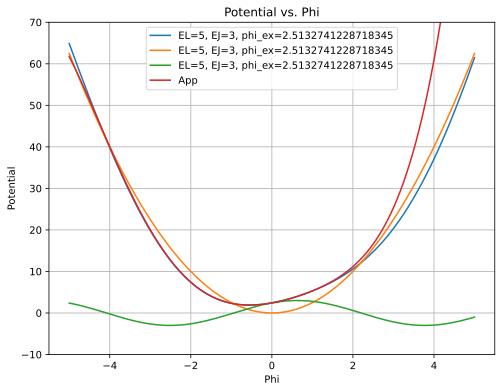

In [45]:


# Calculate the potential for each phi
potential_values = potential(phi_values, EL, EJ, phi_ex)
potential_values1 = potential1(phi_values, EL, EJ, phi_ex)
potential_values2 = potential2(phi_values, EL, EJ, phi_ex)
# Plot the potential
plt.figure(figsize=(8, 6))
plt.plot(phi_values, potential_values, label=f'EL={EL}, EJ={EJ}, phi_ex={phi_ex}')
plt.plot(phi_values, potential_values1, label=f'EL={EL}, EJ={EJ}, phi_ex={phi_ex}')
plt.plot(phi_values, potential_values2, label=f'EL={EL}, EJ={EJ}, phi_ex={phi_ex}')
plt.title('Potential vs. Phi')
plt.plot(phi_values, app+np.min(potential_values), label='App')
plt.xlabel('Phi')
plt.ylabel('Potential')
plt.ylim(-10, 70)
plt.grid(True)
plt.legend()
plt.show()


In [46]:
fluxonium1.phi_operator(energy_esys=True)

array([[-4.70457984e-01, -5.04492986e-01,  2.47089454e-02,
         5.35343935e-05, -4.88396334e-04],
       [-5.04492986e-01, -3.66339267e-01,  7.21958896e-01,
         4.33152205e-02,  5.64738115e-04],
       [ 2.47089454e-02,  7.21958896e-01, -2.60761864e-01,
        -8.93510346e-01, -6.04902377e-02],
       [ 5.35343935e-05,  4.33152205e-02, -8.93510346e-01,
        -1.58491219e-01, -1.04081838e+00],
       [-4.88396334e-04,  5.64738115e-04, -6.04902377e-02,
        -1.04081838e+00, -6.45070524e-02]])

In [47]:
Hs,phase_op, omega_s, phi_zpf, g3, g4, g5, g6 =fluxonium_paras(Ec, EL, EJ, phi_ex)
phase_op

array([[ 3.53083679e-01, -6.18244720e-01, -3.19806454e-02,
         1.07388386e-02,  9.96055307e-04, -2.57384028e-04,
         3.03162021e-05,  7.06136290e-06,  9.47112325e-07,
         2.12712804e-07,  3.26824497e-08,  8.80801160e-09,
         1.20133769e-08, -4.06973322e-08, -2.88315913e-08,
        -1.96671345e-08, -6.94646957e-09,  5.64319130e-09,
        -4.03083023e-10, -1.10869717e-09],
       [-6.18244720e-01,  2.12379770e-01,  8.47393351e-01,
        -3.77296814e-02, -1.72202389e-02,  1.36103348e-03,
        -4.32572376e-04, -4.46169518e-05, -1.21429251e-05,
        -1.47501162e-06, -3.79455938e-07, -2.13978494e-08,
        -9.18491625e-08,  1.46222276e-07,  1.83611879e-07,
         7.81852123e-08,  7.11767577e-08, -2.83806393e-08,
         2.34590498e-08, -5.32473266e-09],
       [-3.19806454e-02,  8.47393351e-01,  1.35177030e-01,
        -1.00972658e+00, -3.89632341e-02,  2.27220430e-02,
        -1.56071604e-03, -5.93641936e-04, -5.43421617e-05,
        -1.71124367e-05, -1.7

In [48]:
omega_s

array([1.96867681])

In [49]:
2*np.sqrt(2)*phi_zpf*g3/omega_s

array([0.06068635])

In [50]:
g5

array([-0.00134632])

In [51]:
# result = fluxonium.get_spectrum_vs_paramvals(param_name='flux', param_vals=np.linspace(0,1,100), evals_count=4, subtract_ground=True)
# result.plot_evals_vs_paramvals()

In [52]:
import numpy as np
from functions import *
from scipy.optimize import minimize

# Define the potential function
def potential(phi, EL, EJ, phi_ex):
    return 0.5 * EL * phi**2 - EJ * np.cos(phi - phi_ex)

# Function to find the minimum
def find_minimum(EL, EJ, phi_ex, initial_guess=0):
    phi_ex = phi_ex*2*np.pi
    result = minimize(potential, x0=initial_guess, args=(EL, EJ, phi_ex))
    return result.x  # The value of phi at the minimum

# Example usage

phi_min = find_minimum(EL, EJ, phi_ex)
phi_ex = phi_ex*2*np.pi

beta = EJ/EL
sdim = 20
phi_min = find_minimum(EL,EJ,phi_ex)
# potential expansion around minimum
c2 = beta*np.cos(phi_min - phi_ex) + 1
c3 = -beta*np.sin(phi_min-phi_ex)
c4 = -beta*np.cos(phi_min-phi_ex)
omega_s = np.sqrt(8*c2*EL*Ec)
phi_zpf = np.power(2*Ec/(EL*c2),1/4)
g2 = EL * phi_zpf**2*c2/2
g3 = EL * phi_zpf ** 3 * c3 / 3 / 2
s = annihilation(sdim)
sd = creation(sdim)
x2 = np.matmul(s+sd,s+sd)
phi_op = phi_zpf*(s+sd)+(phi_min)*np.identity(sdim)
Hs =(omega_s * np.matmul(sd,s)- EL*(beta*sci.linalg.cosm(phi_op-(phi_ex)*np.identity(sdim))- 1/2*phi_op@phi_op)- g2*x2)
charge_op = -1j*(s-sd)/(2*phi_zpf)
energy0,U = np.linalg.eigh(Hs)
energy0,U = sort_eigenpairs(energy0, U)
energy0 = energy0 - energy0[0]
Ud = U.transpose().conjugate()
Hs = Ud@Hs@U
Hs = Hs - Hs[0,0]*np.identity(sdim)
phase_op, charge_op = Ud@phi_op@U,Ud@charge_op@U


In [53]:
g3

array([-0.06626172])

In [54]:
phase_op

array([[-8.11885704e-02, -6.28966287e-01,  1.10476310e-02,
        -1.00890522e-02, -1.23842542e-04, -4.75097144e-05,
        -6.55037399e-08, -8.90636145e-06, -7.23266551e-06,
         6.56435570e-09, -1.92097237e-07, -2.53940020e-08,
         2.00191756e-08, -1.00006335e-08,  2.94306870e-09,
         1.18503795e-09,  6.10361135e-09,  1.31307967e-08,
        -6.04362384e-09,  2.11229879e-08],
       [-6.28966287e-01, -3.26729966e-02,  8.55467154e-01,
        -1.14098356e-02, -1.52395310e-02,  8.42067064e-05,
        -1.25154543e-05, -1.56170634e-04, -1.36229296e-05,
         7.55144286e-08, -1.21220406e-07, -5.81815832e-07,
         1.23213767e-08,  9.55050459e-08,  5.21117081e-08,
         3.35416159e-08, -5.87589389e-08, -4.52019139e-08,
        -8.45086870e-08,  8.77775154e-08],
       [ 1.10476310e-02,  8.55467154e-01, -1.24630290e-02,
         1.01911925e+00,  1.09875213e-02, -1.91847713e-02,
         1.69420682e-05, -2.14047075e-05,  3.10014144e-04,
         7.47273678e-07, -1.6

In [55]:
2*np.sqrt(2)*g3/omega_s*phi_zpf

array([-0.06068635])

In [56]:
phi_min - 6*g3/omega_s

array([-0.25167883])

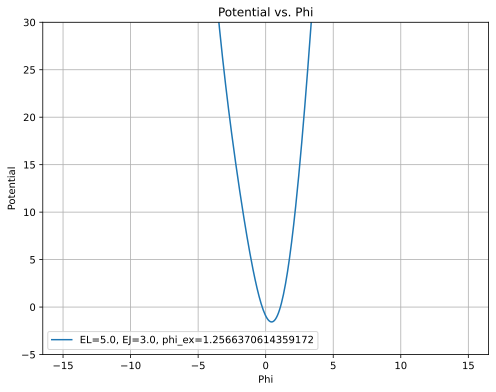

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Define the potential function
def potential(phi, EL, EJ, phi_ex):
    return 0.5 * EL * phi**2 - EJ * np.cos(phi - phi_ex)

# Set the parameters
EL = 5.0  # Example value for EL
EJ = 3.0  # Example value for EJ
phi_ex = 0.2*2*np.pi # Example value for phi_ex

# Generate a range of phi values
phi_values = np.linspace(-15, 15, 400)

# Calculate the potential for each phi
potential_values = potential(phi_values, EL, EJ, phi_ex)

# Plot the potential
plt.figure(figsize=(8, 6))
plt.plot(phi_values, potential_values, label=f'EL={EL}, EJ={EJ}, phi_ex={phi_ex}')
plt.title('Potential vs. Phi')
plt.xlabel('Phi')
plt.ylabel('Potential')
plt.ylim(-5,30)
plt.grid(True)
plt.legend()
plt.show()


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\varphi$', ylabel='Re $\\psi_j(\\varphi)$,  energy [GHz]'>)

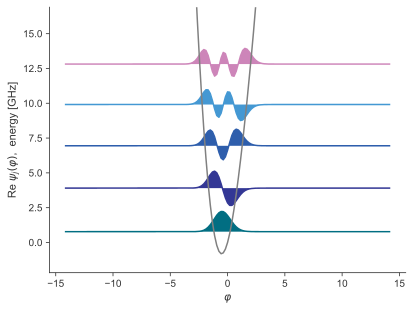

In [58]:
from scqubits.core.discretization import Grid1d
grid = Grid1d(-np.pi/4, np.pi/4, 100)
fluxonium1.plot_wavefunction(-1)

In [17]:
fluxonium = scq.Fluxonium(
    EJ=4.9,
    EC=1.7,
    EL=0.4,
    cutoff = 110,
    flux = 0.5,
    truncated_dim=5
)

fluxonium.eigenvals() - fluxonium.eigenvals()[0]

array([ 0.        ,  0.40955116,  5.58039473,  8.02769749, 11.55391452,
       13.42375774])

In [42]:
# Set the base flux
base_flux = 0.50004
fluxonium.flux = base_flux
h=1e-6
# Compute eigenvalues at the base flux
eigenvals_base = fluxonium.eigenvals() - fluxonium.eigenvals()[0]

# Compute eigenvalues at base_flux + h
fluxonium.flux = base_flux + h
eigenvals_plus = fluxonium.eigenvals() - fluxonium.eigenvals()[0]

# Compute eigenvalues at base_flux - h
fluxonium.flux = base_flux - h
eigenvals_minus = fluxonium.eigenvals() - fluxonium.eigenvals()[0]

# Compute the central difference derivative
derivative = (eigenvals_plus - eigenvals_minus) / (2 * h)

In [43]:
derivative

array([ 0.        ,  0.01812776,  0.00805565,  0.00946138,  0.00618421,
       -0.00719136])

In [44]:
fluxonium.flux = base_flux
fluxonium.tphi_1_over_f_flux(1e-6,1,0)/1e6
# 42319.434199503296

1.9958777457541605

In [46]:
1.794047789571633*0.02016712

0.03618077705802587

In [47]:
1.9958777457541605* 0.01812776

0.036180792764372444

In [54]:
fluxonium.n_operator(energy_esys=True)

array([[0.-1.35402897e-19j, 0.-7.02600741e-02j, 0.+2.28565850e-03j,
        0.+4.75898462e-01j, 0.-6.91312298e-04j],
       [0.+7.02600741e-02j, 0.-3.94608428e-20j, 0.+5.54502688e-01j,
        0.-1.95179416e-03j, 0.-2.04439142e-01j],
       [0.-2.28565850e-03j, 0.-5.54502688e-01j, 0.+2.68562425e-21j,
        0.-4.66099164e-01j, 0.+2.88781923e-04j],
       [0.-4.75898462e-01j, 0.+1.95179416e-03j, 0.+4.66099164e-01j,
        0.-3.57821928e-21j, 0.+8.08550087e-01j],
       [0.+6.91312298e-04j, 0.+2.04439142e-01j, 0.-2.88781923e-04j,
        0.-8.08550087e-01j, 0.-1.65836818e-20j]])

In [55]:
9.37304957*4

37.49219828

In [56]:
fluxonium.n_operator(energy_esys=True)

array([[0.-1.35402897e-19j, 0.-7.02600741e-02j, 0.+2.28565850e-03j,
        0.+4.75898462e-01j, 0.-6.91312298e-04j],
       [0.+7.02600741e-02j, 0.-3.94608428e-20j, 0.+5.54502688e-01j,
        0.-1.95179416e-03j, 0.-2.04439142e-01j],
       [0.-2.28565850e-03j, 0.-5.54502688e-01j, 0.+2.68562425e-21j,
        0.-4.66099164e-01j, 0.+2.88781923e-04j],
       [0.-4.75898462e-01j, 0.+1.95179416e-03j, 0.+4.66099164e-01j,
        0.-3.57821928e-21j, 0.+8.08550087e-01j],
       [0.+6.91312298e-04j, 0.+2.04439142e-01j, 0.-2.88781923e-04j,
        0.-8.08550087e-01j, 0.-1.65836818e-20j]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\varphi$', ylabel='Re $\\psi_j(\\varphi)$,  energy [GHz]'>)

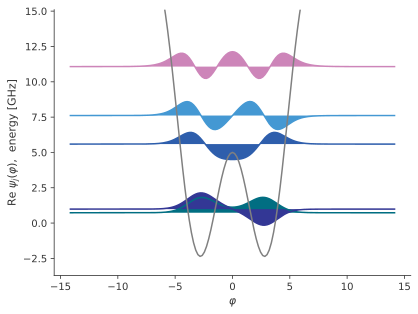

In [57]:
fluxonium.plot_wavefunction(-1)

In [58]:
result = fluxonium.get_spectrum_vs_paramvals(param_name='flux', param_vals=np.linspace(0,1,100), evals_count=4, subtract_ground=True)

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

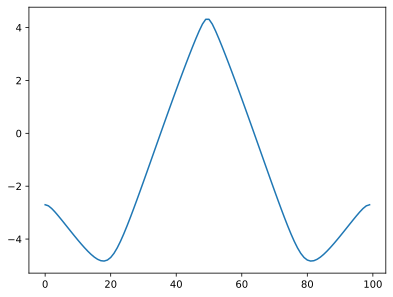

In [59]:
import matplotlib.pyplot as plt
plt.plot((result.energy_table)[:,2]-2*(result.energy_table)[:,1])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\Phi_{ext}/\\Phi_0$', ylabel='energy [GHz]'>)

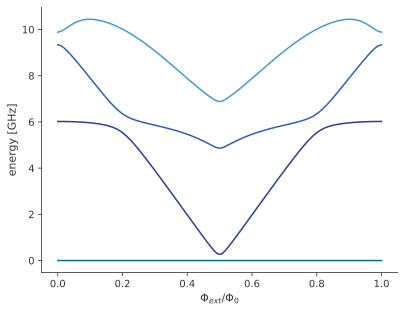

In [60]:
result = fluxonium.get_spectrum_vs_paramvals(param_name='flux', param_vals=np.linspace(0,1,100), evals_count=4, subtract_ground=True)
result.plot_evals_vs_paramvals()